In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
loan_train=pd.read_csv('C:/Users/user/Desktop/pythonfiles/loan_train.csv')
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# FILTERING OUT THE OBJECT FEATURES

cat_features=[features for features in loan_train.columns if loan_train[features].dtype=='O']
cat_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [5]:
cate_features=[features for features in cat_features if features!='Loan_ID' and features!='Loan_Status']
cate_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [6]:
#FINDING THE PERCENTAGE OF NULL VALUES IN OBJECT TYPES


for features in cate_features:
    data=loan_train.copy()
    print(features,' ',(data[features].isnull().sum()/len(data[features])*100))

Gender   2.1172638436482085
Married   0.4885993485342019
Dependents   2.44299674267101
Education   0.0
Self_Employed   5.211726384364821
Property_Area   0.0


In [29]:
# FILLING MISSING VALUES OF CATEGORICAL FEATURES( WITH MISSING TERM)

def cat_f(data,features):
    data[features]=data[features].fillna('Missing')
    return data
loan_train=cat_f(loan_train,cate_features)



In [30]:
loan_train[cate_features].isnull().sum()  # all missing values replaced

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [34]:
loan_train['Gender'].value_counts() # checking whether replaced or not

Male       489
Female     112
Missing     13
Name: Gender, dtype: int64

In [35]:
# TAKING OUT THE NUMERICAL FEATURES

numerical_features=[features for features in loan_train.columns if loan_train[features].dtype!='O']
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [36]:
# LEAVING OUT THE CREDIT HISTORY FOR TIME BEING 

num_features=[features for features in numerical_features if features!='Credit_History']
num_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [37]:
# DISPLAYING ONLY CONTINUOUS FEATURES

loan_train[num_features] # continuous numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [38]:
# CHECKING FOR THE CONTINUOUS NUMERICAL FEATURES MISSING VALUE PERCENTAGE

for features in num_features:
    data=loan_train.copy()
    print(features,' ',(data[features].isnull().sum()/len(data[features])*100))

ApplicantIncome   0.0
CoapplicantIncome   0.0
LoanAmount   3.5830618892508146
Loan_Amount_Term   2.2801302931596092


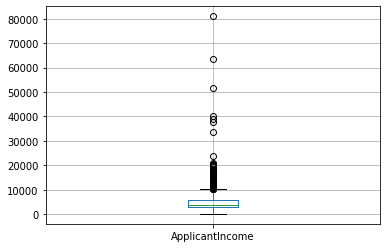

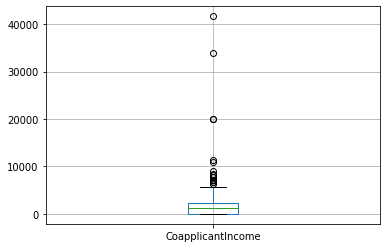

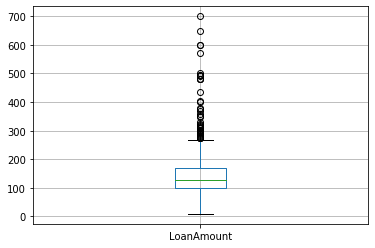

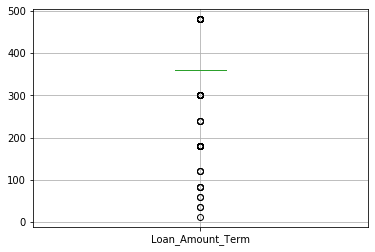

In [39]:

# BOXPLOT CHECKING

for features in num_features:
    loan_train.boxplot(column=features)
    plt.show()
    
    
    # these have quite a significant number of outliers

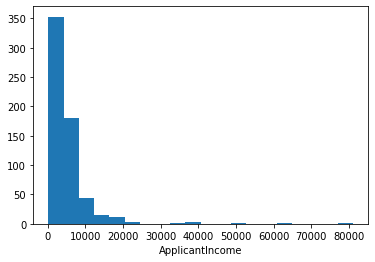

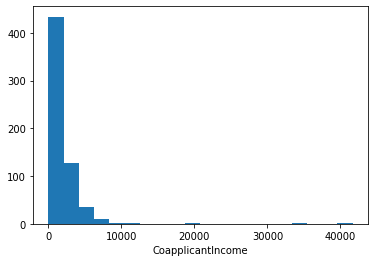

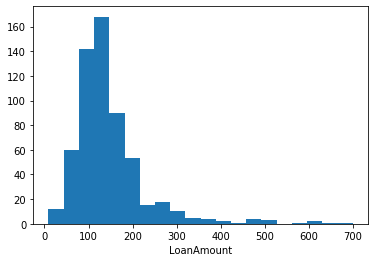

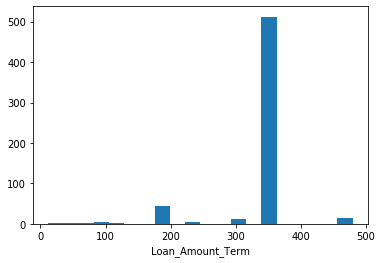

In [41]:
# HISTOGRAM CHECKING



for features in num_features:
    plt.hist(loan_train[features],bins=20)
    plt.xlabel(features)
    plt.show()

In [42]:

# SINCE THERE ARE QUITE A SIGNIFICANT NO. OF OUTLIERS , REPLACIMG MISSING VALUES WITH MEDIAN VALUES SEEMS FEASABLE

for features in num_features:
    print(features,' ',loan_train[features].median())
    
    

ApplicantIncome   3812.5
CoapplicantIncome   1188.5
LoanAmount   128.0
Loan_Amount_Term   360.0


In [43]:
# replacing the missing values with the median values


def cat1_f(data,features):
    med=data[features].median()
    data[features]=data[features].fillna(med)
    return data

loan_train=cat1_f(loan_train,num_features)
    
    


In [44]:
loan_train[num_features].isnull().sum()  # all missing values replaced

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [48]:
# LOOKING IN THE CREDIT_HISTORY COLUMN

loan_train['Credit_History'].isnull().sum()/len(loan_train['Credit_History'])*100

# 8.14% missing values in credith_history

8.143322475570033

In [49]:
loan_train['Credit_History'].value_counts()

# it has 2 categories , and it is of integer datatype

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [54]:
# Changing the datatype of credit history

loan_train['Credit_History']=loan_train['Credit_History'].astype('int')



In [55]:
# replacing credit_history missing values with'missing

loan_train['Credit_History']=loan_train['Credit_History'].fillna('Missing')

In [57]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null int32
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 60.1+ KB


In [58]:
# converting the object datatypes to category datatype for the ease of encoding

for features in cate_features:
    loan_train[cate_features]=loan_train[cate_features].astype('category')

In [59]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null category
Married              614 non-null category
Dependents           614 non-null category
Education            614 non-null category
Self_Employed        614 non-null category
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null int32
Property_Area        614 non-null category
Loan_Status          614 non-null object
dtypes: category(6), float64(3), int32(1), int64(1), object(2)
memory usage: 35.6+ KB


In [60]:
loan_train['Credit_History']=loan_train['Credit_History'].astype('category')
loan_train['Loan_Status']=loan_train['Loan_Status'].astype('category')

# converting credit history and loan_status to category

In [61]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null category
Married              614 non-null category
Dependents           614 non-null category
Education            614 non-null category
Self_Employed        614 non-null category
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null category
Property_Area        614 non-null category
Loan_Status          614 non-null category
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 29.8+ KB


In [62]:
loan_train.to_csv(r'C:\Users\user\Desktop\pythonfiles\newtraindata_loan.csv' , index=False)